In [ ]:
!pip install mmh3
!pip install string
!pip install uuid

  Stored in directory: /root/.cache/pip/wheels/38/b4/ea/6e4e321c625d3320c0c496bf4088371546d8fce5f1dd71b219
Successfully built mmh3
  Could not find a version that satisfies the requirement string (from versions: )
No matching distribution found for string
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statistics import median
import matplotlib as mpl
import math
import random
import string
import mmh3
import uuid
import time
%matplotlib inline

In [ ]:
inp = np.array([abs(mmh3.hash(''.join(random.choices(string.ascii_uppercase + string.digits, k=10)), 1))%100000 for i in range(10**6)])
dist_vals, vals_frq = np.unique(inp, return_counts=True)
dist_vals, vals_frq = np.array(dist_vals), np.array(vals_frq)

In [ ]:
from google.colab import files
files.download('corr.png') 

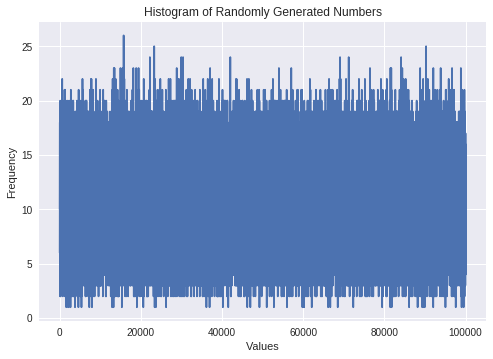

In [ ]:
mpl.style.use('seaborn')
plt.plot(dist_vals, vals_frq)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Randomly Generated Numbers')
plt.savefig("uniform.png")
plt.show()

In [ ]:
mat = np.zeros((50, 10**5))
for j in range(mat.shape[0]):
    random.seed(0)
    for i in range(mat.shape[1]):
        rand_string = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
        mat[j, i] = abs(mmh3.hash(rand_string, j))%1000

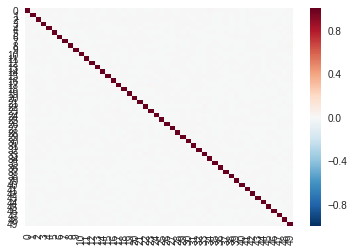

In [ ]:
mat = mat.astype(np.floata64)
sns_plot = sns.heatmap(np.corrcoef(mat), vmin=-1, vmax=1, center=0)
sns_plot.figure.savefig("corr.png")

In [ ]:
def update_bit_vector(list_nums):
    global bit_vector
    for num in list_nums:
        resulted_vector = [0]*params['m']
        resulted_vector[num] = 1
        bit_vector = [(op1|op2) for op1, op2 in zip(bit_vector, resulted_vector)]

In [ ]:
params = {}
params['n'] = int(input("Enter input size : "))
prob = float(input("Enter error probability : "))
params['m'] = int(-params['n']*np.log(prob)*math.pow(np.log(2), -2))
params['k'] = int(math.ceil(np.log(2)*(params['m']/float(params['n']))))

print("k : " + str(params['k']))
print("m : " + str(params['m']))
bit_vector = [0]*params['m']

start = time.time()
for ip in range(params['n']):
    rand_string = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
    seeds = []
    for i in range(1,params['k']+1):
        seeds.append(abs(mmh3.hash(rand_string, i)) % params['m'])
    
    update_bit_vector(seeds)
    
end = time.time()
print("Time to process all strings : " + str(end-start) + "s")

Enter input size : 1000
Enter error probability : 0.03
k : 6
m : 7298
Time to hash all elements : 5.982492685317993s


In [ ]:
def check_availability(seeds):
    for idx in seeds:
        if bit_vector[idx] != 1:
            return 0
        
    return 1

In [ ]:
def monte_carlo_sim():
    false_positives = 0
    num_examples = 10**6
    for i in range(num_examples):
        rand_string = str(uuid.uuid1())
        seeds = []
        for j in range(1,params['k']+1):
            seeds.append(abs(mmh3.hash(rand_string, j)) % params['m'])
        false_positives += check_availability(seeds)
    
    return false_positives/float(num_examples)

In [ ]:
start = time.time()
sim_val = monte_carlo_sim()
end = time.time()
print("Using simulation false positive error probability : " + str(sim_val))
print("Simulation time : " + str(end-start) + "s")
analytic_prob = math.pow(1-math.exp(-(params['n']/float(params['m'])*params['k'])), params['k'])
print("Analytically computed false positive error probability : ", str(analytic_prob))
print("False positive error probability given in Input : " + str(prob))

Using simulation false positive error probability : 0.030963
Simulation time : 16.51903796195984s
Analytically computed false positive error probability :  0.031010286927678345
False positive error probability given in Input : 0.03
